<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор" data-toc-modified-id="Обзор-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Средние-по-целевому-признаку-оттока" data-toc-modified-id="Средние-по-целевому-признаку-оттока-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Средние по целевому признаку оттока</a></span></li><li><span><a href="#Гистограммы.-Корреляция" data-toc-modified-id="Гистограммы.-Корреляция-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Гистограммы. Корреляция</a></span></li></ul></li><li><span><a href="#Модели-предсказания-оттока" data-toc-modified-id="Модели-предсказания-оттока-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модели предсказания оттока</a></span><ul class="toc-item"><li><span><a href="#Улучшайзинг-моделей" data-toc-modified-id="Улучшайзинг-моделей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Улучшайзинг моделей</a></span></li></ul></li><li><span><a href="#Дендрограмма" data-toc-modified-id="Дендрограмма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Дендрограмма</a></span></li><li><span><a href="#Кластеризация" data-toc-modified-id="Кластеризация-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация</a></span><ul class="toc-item"><li><span><a href="#&quot;Портрет-клиента&quot;" data-toc-modified-id="&quot;Портрет-клиента&quot;-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>"Портрет клиента"</a></span></li></ul></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

# Описание проекта
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал.

Чтобы бороться с оттоком, отдел по работе с клиентами перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами

#  План работ
- Загрузить данные.
- Провести исследовательский анализ данных (EDA). Выявить корреляции признаков.
- Удалить некоррелирующие данные перед применением моделей прогноза.
- Построить модель прогнозирования оттока клиентов, с помощью бинарной классификации.
  - логистической регрессией,
  - случайным лесом.
- Оценить метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Настроить модели под задачу полноты предскащания. Выбрать лучшую модель.
- Построить матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисовать дендрограмму.
- Сделать кластеризацию клиентов на основании алгоритма K-Means
- Построить распределения признаков для кластеров.
- Сформулировать выводы и сделать базовые рекомендации по работе с клиентами

# Описание данных
Данные клиента за предыдущий до проверки факта оттока месяц:
- `gender` — пол;
- `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
- `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате - первого абонемента);
- `Phone` — наличие контактного телефона;
- `Age` — возраст;
- `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
- `Group_visits` — факт посещения групповых занятий;
- `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
- `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
- `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- `Churn` — факт оттока в текущем месяце.

In [5]:
#Импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Обзор
Загрузим данные, посмотрим базовые метрики и дубликаты.

In [18]:
#загрузка с обработкой ошибок
try:
    fitclub = pd.read_csv('/datasets/gym_churn.csv')
except FileNotFoundError:
    fitclub = pd.read_csv('pr12/gym_churn.csv')
       
print('Общий вид данных: ')
display(fitclub.head(5))
print('--------------------------------------------------')
print('Типы и кол-во')
fitclub.info()
print('--------------------------------------------------')
print('Стат. метрики')
display(fitclub.describe().T)
print('--------------------------------------------------')
print('Полных дубликатов:', fitclub.duplicated().sum())
print('--------------------------------------------------')

Общий вид данных: 


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


--------------------------------------------------
Типы и кол-во
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int6

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


--------------------------------------------------
Полных дубликатов: 0
--------------------------------------------------



## Анализ
- Имеем нормальные данные без пропусков и дубликатов.
- Значения похожи на реальные, без явных выбросов.
- Равномерно распределены по гендерному признаку, в основном молодежь (старшему 41 год???).
- Половина - сотрудники компаний-партнёров.
- Большинство клиентов живут рядом и имеют месячный абонемент, хотя в среднем ходят уже больше 3-х месяцев.
- Отток составляет  1 к 3 - это поможет в дальнейшем корректировать модель классификации.

### Средние по целевому признаку оттока
Посмотрим на средние показатели для действующих и "слившихся" клиентов 

In [7]:
fitclub.groupby('Churn').mean().T

Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


Сразу заметны признаки, отличающие отток: меньшие время жизни и срок абонемента, их меньше среди пришедших по рекомендации друзей и от компании-партнёра, они моложе, оставляют меньше денег на "плюшки", меньше посещают групповые занятия и в последний месяц снижают частоту посещений.

### Гистограммы. Корреляция
Увидим эти зависимости на гистограммах(нормированных по каждой группе) и посмотрим корреляцию между признаками для всех и отдельно для оттока.

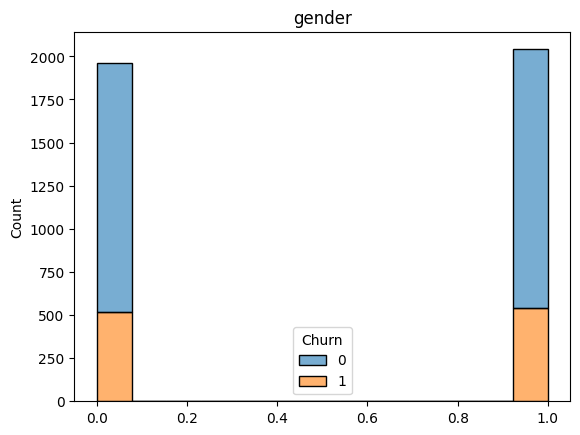

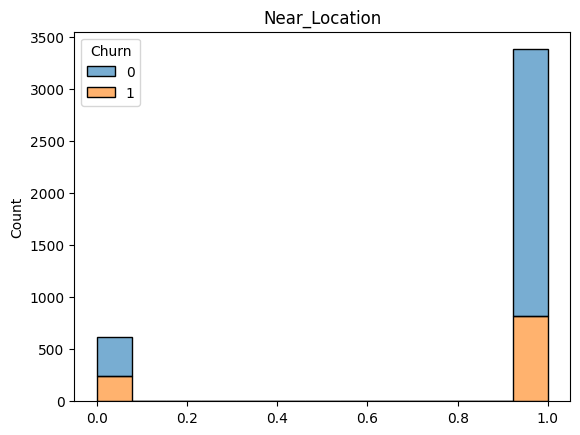

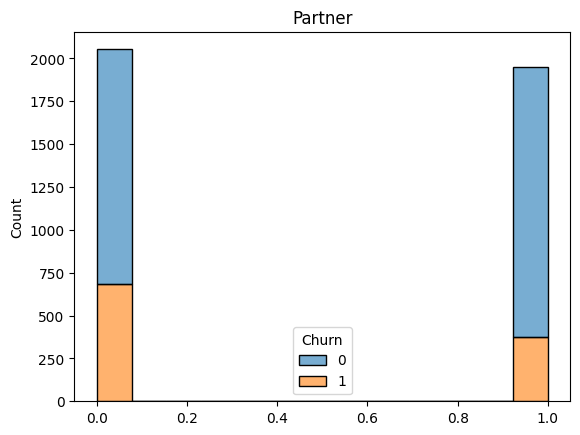

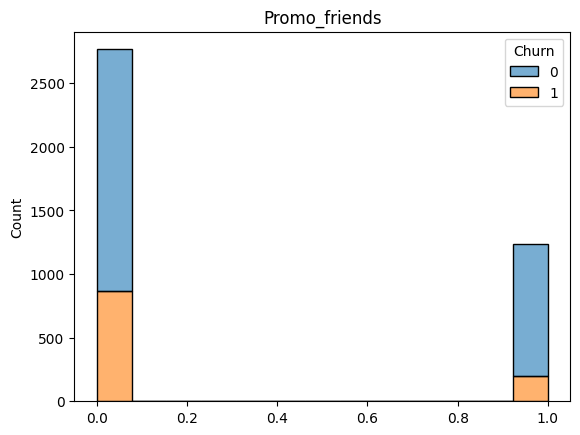

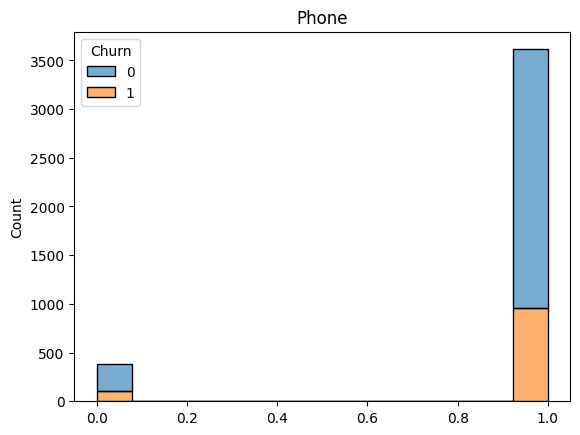

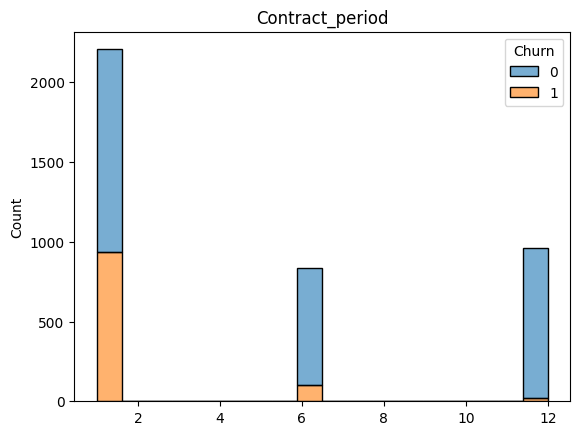

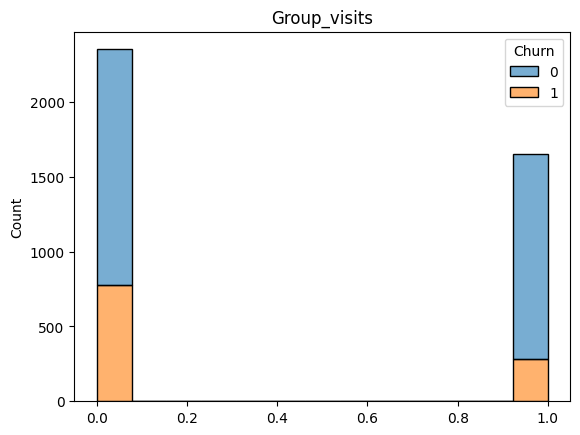

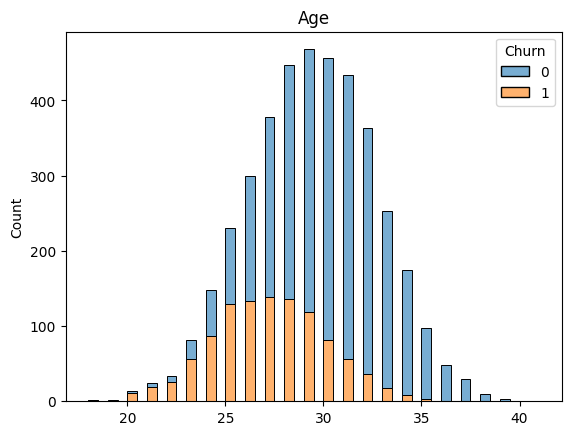

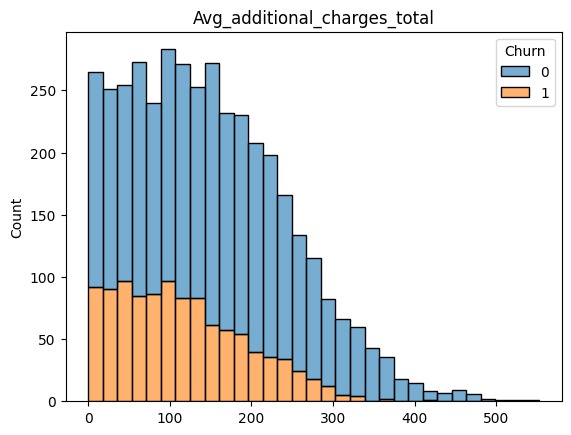

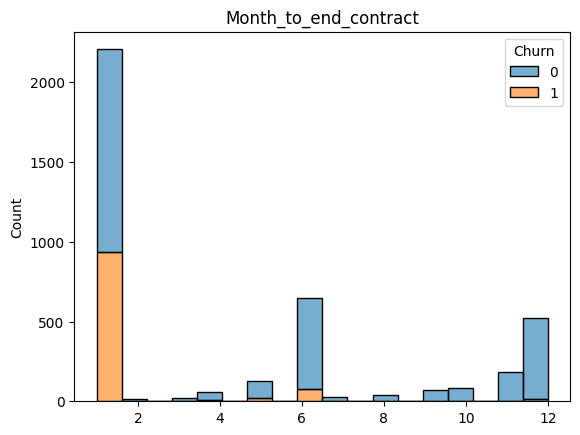

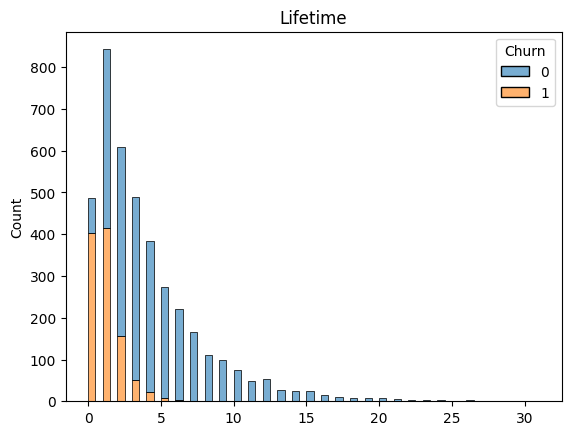

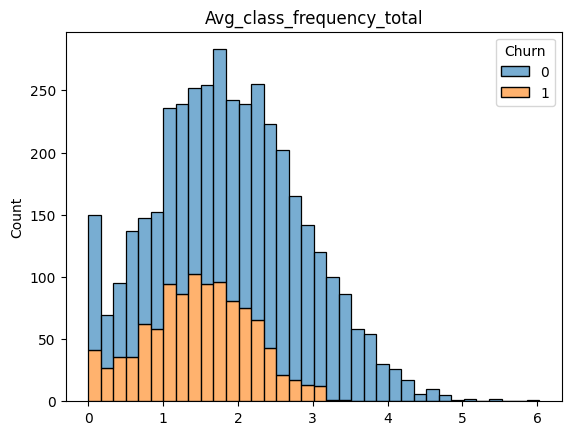

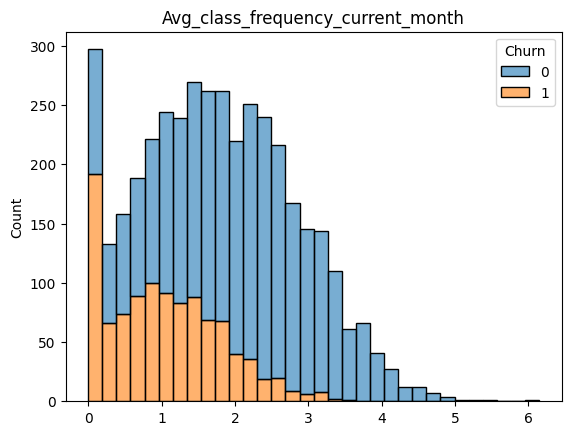

In [8]:
#Гистограммы
for item in fitclub.drop('Churn', axis=1).columns:
    sns.histplot(data=fitclub, x=item, hue='Churn', multiple = 'stack', common_norm=False, alpha=.6, fill=True)
    plt.title(item)
    plt.xlabel('')
    plt.show();

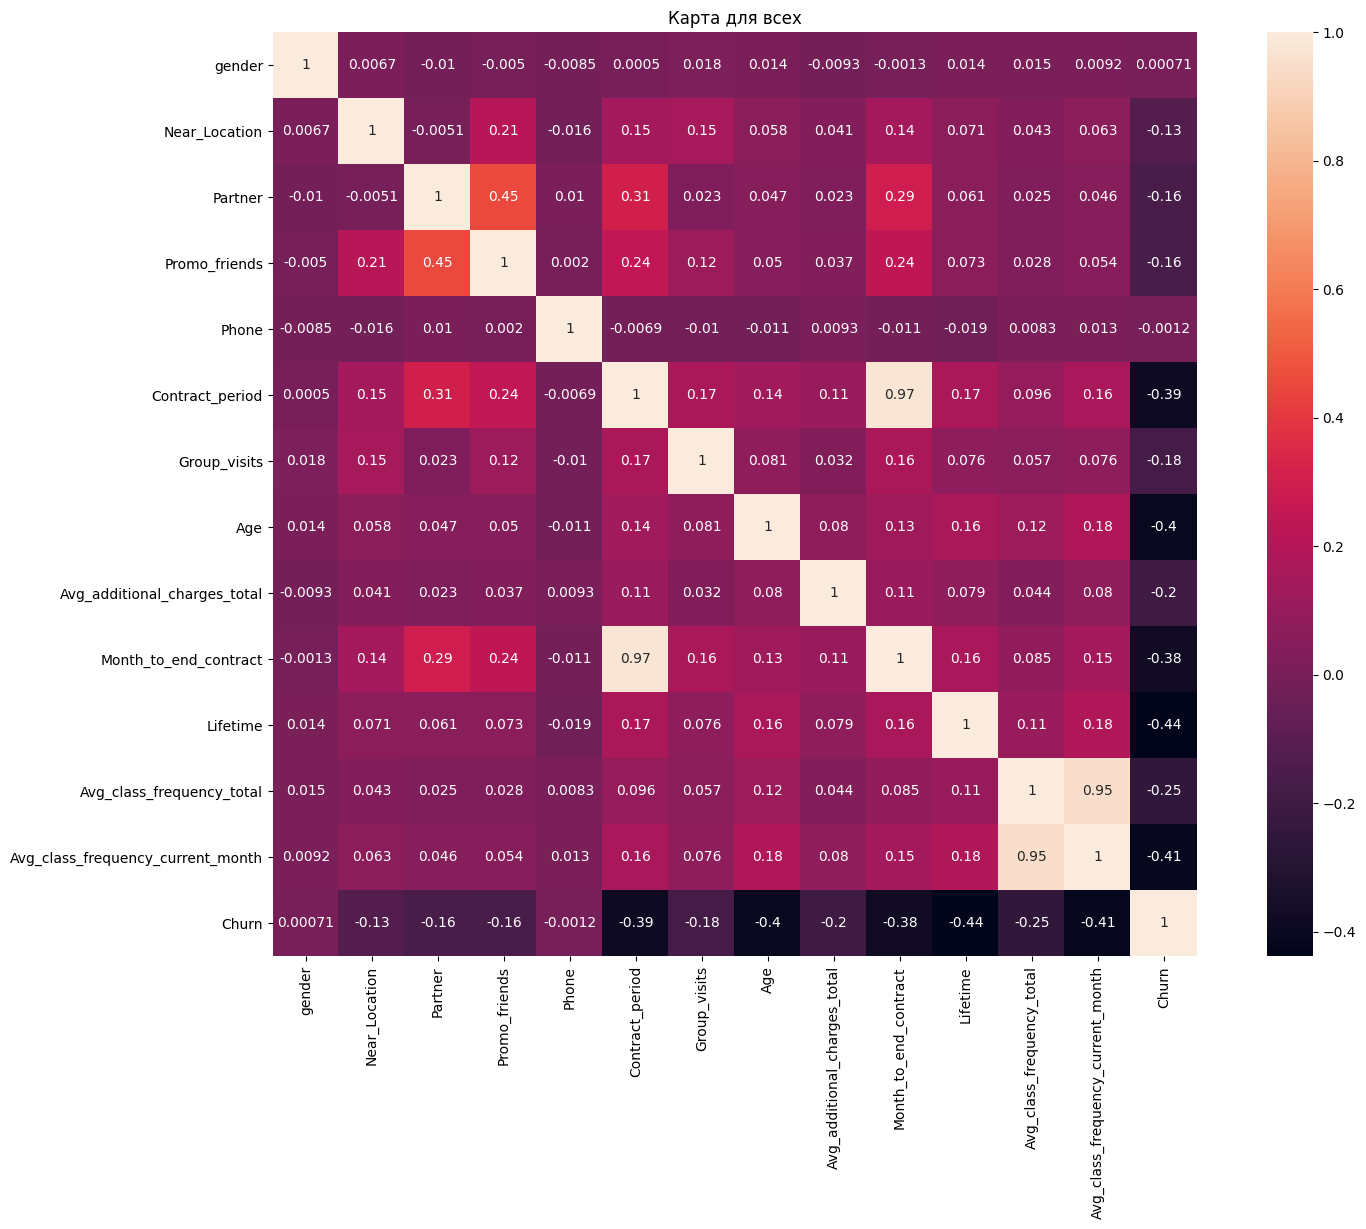

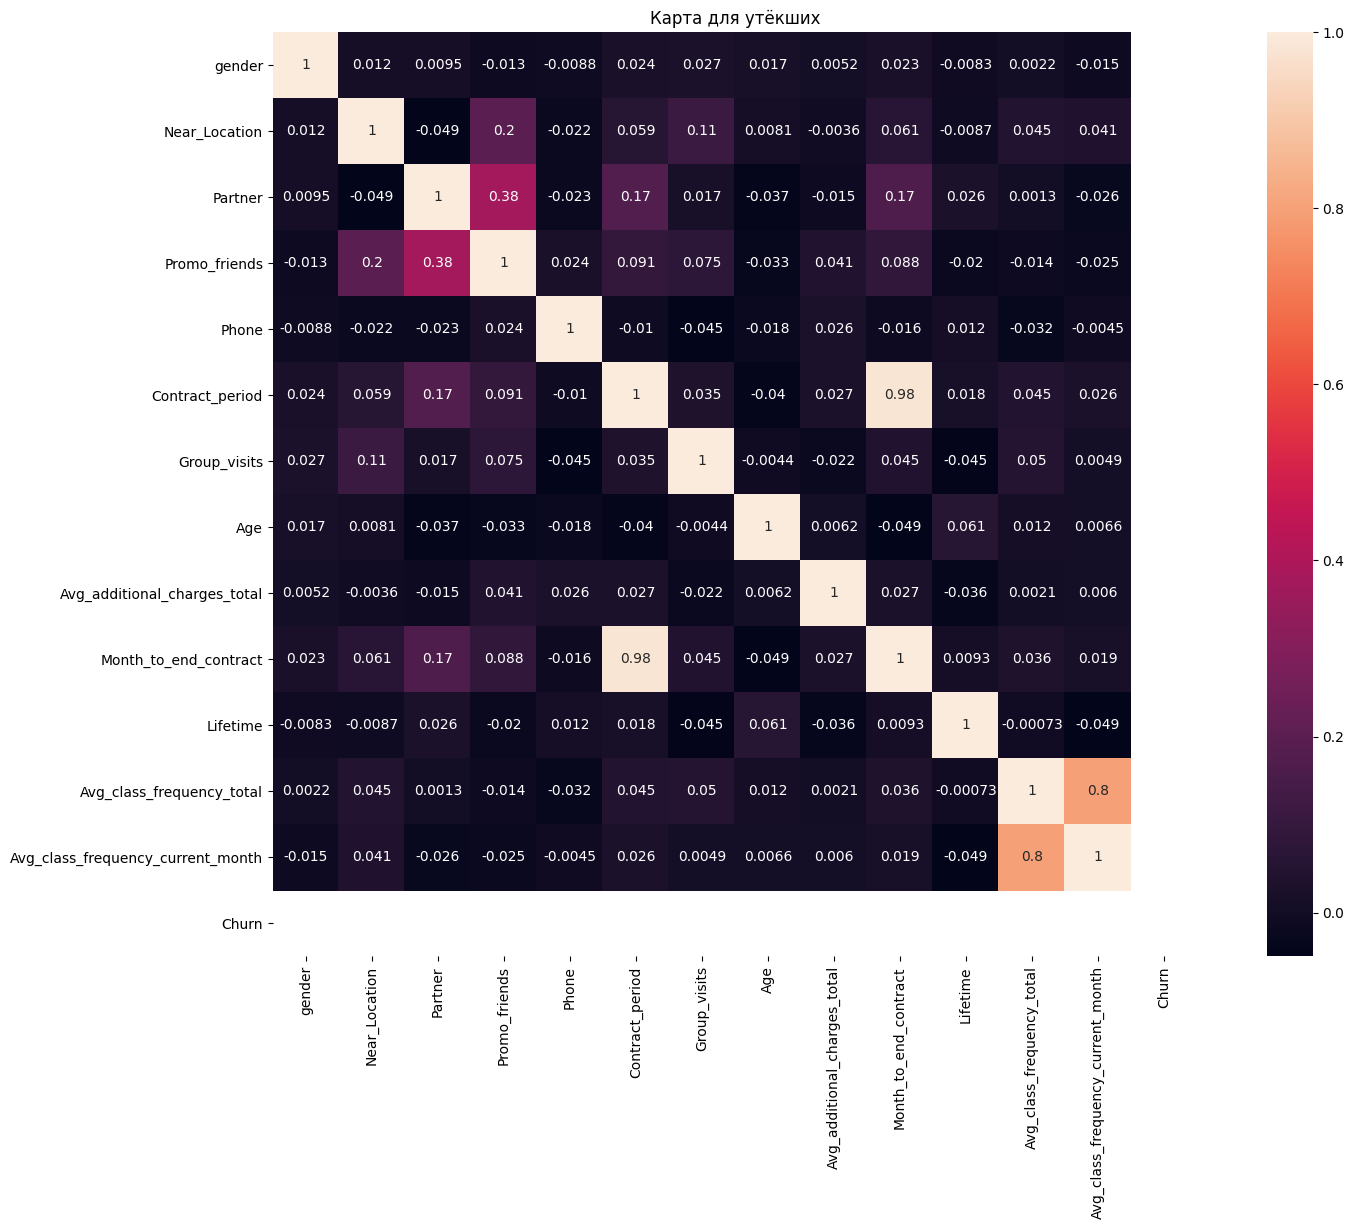

In [9]:
#Тепловые карты
plt.figure(figsize=(18,12))
cm = fitclub.corr()
plt.title('Карта для всех')
sns.heatmap(cm, annot=True, square=True)
plt.show()
plt.figure(figsize=(18,12))
plt.title('Карта для утёкших')
cm = fitclub.query('Churn == 1').corr()
sns.heatmap(cm, annot=True, square=True);

Гистограммы распределения подтвердили выявленные зависимости и стало понятно, что пол и наличие телефона никак не влияют на отток. 

Тепловая карта обнаружила 2 сильнозависимых пары признаков: срок абонемента - срок до окончания текущего абонемента, а также средняя посещаемость - посещаемость в последний месяц.

Для уменьшения размерности и улучшения качества работы моделей следовало удалить 4 лишних признака. Но если обратить внимание на признак посещаемости в последний месяц, можно увидеть отличную для оттока корреляцию, а корреляция в группе "остающихся" вообще равна 1 (не выведено на график). Этот признак может быть важен для классификации.

Поэтому удаляем 3 лишние признака: `Month_to_end_contract`, `gender`, `Phone`

In [10]:
fitclub.drop(columns=['Month_to_end_contract', 'gender', 'Phone'], inplace=True)

## Модели предсказания оттока
Построим модели предсказания оттока на базе 2-алгоритмов бинарной классификации: `LogisticRegression` и `RandomForestClassifier`.

Выведем метрики оценки качества моделей

In [11]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    
# разделим данные на признаки (матрица X) и целевую переменную (y)
X = fitclub.drop('Churn', axis=1)
y = fitclub['Churn']

#разделим данные на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)
#Нормализация
# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Нормализуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)


# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
#и вероятности для эксперимента с порогом
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]
# выведем все метрики
print_all_metrics(y_test, lr_predictions, title='Метрики для модели логистической регрессии:')

# Те же действия для модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0)
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]
print_all_metrics(y_test, rf_predictions, title='Метрики для модели случайного леса:')

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.86
	Recall: 0.83
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.86
	Recall: 0.82


Обе модели показали на валидации идентичную точность предсказания. Но наше распределение классов 1 к 3, поэтому вероятность предсказания 80% чуть лучше случайного (75%). Для задачи бизнеса по удержанию клиентов важно полнее предсказывать склонных к оттоку, поэтому главная метрика `Recall`, которая как раз самая слабая.

### Улучшайзинг моделей
Изменим порог отнесения к классу "отток" и снова запустим модели.

In [12]:
#порог
threshold = 0.35

# на основании вероятностей и соотношения классов рассчитаем predict
lr_custom_predictions = [0 if i < threshold else 1 for i in lr_probabilities]
rf_custom_predictions = [0 if i < threshold else 1 for i in rf_probabilities]

# Метрики для прогнозов по новому порогу
print('Метрики для прогнозов с кастомным порогом')
print_all_metrics(y_test, lr_custom_predictions, title='Метрики для модели логистической регрессии:')
print_all_metrics(y_test, rf_custom_predictions, title='Метрики для модели случайного леса:')

Метрики для прогнозов с кастомным порогом
Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.81
	Recall: 0.87
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.79
	Recall: 0.92


На этот раз модель на базе `RandomForestClassifier` стала лучшей . Полнота предсказаний - 0,92.

## Дендрограмма
Построим "портрет" клиента. Для этого кластеризуем наборы признаков и визуализируем связи на дендрограмме. (Для ускорения отрисовки используем случайную частичную подвыборку) 

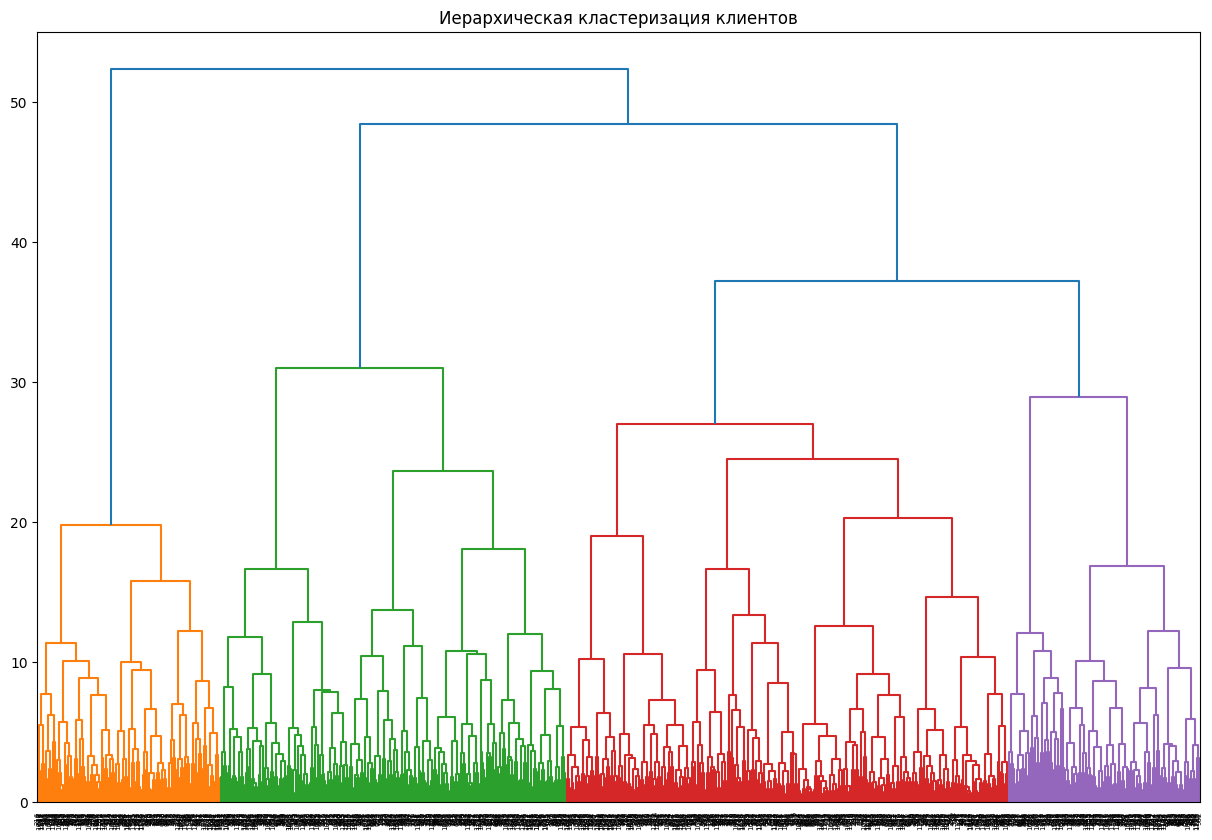

In [13]:
#Нормализуем все данные
X_sc = scaler.fit_transform(X)

#Возьмем случайную подвыборку, используя "молоток" не по назначению
X_1, X_2, y_1, y_2 = train_test_split(X_sc, y, test_size=0.3)

#сохраним таблицу «связок» между признаками
linked = linkage(X_2, method = 'ward')

#визуализируем связки на дендрограмме
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация клиентов')
plt.show() 

Модель предлагат 4 кластера. Я бы остановился на 3-х, но по условию задачи надо выделить 5 "портретов".

## Кластеризация
Для кластеризации используем модель `K_means` с количеством кластеров - 5.

Посмотрим распределение средних значений признаков в разрезе кластеров

In [14]:
#зададим модель кластеризации k_means
km = KMeans(n_clusters=5, random_state=0) 
#прогнозируем кластеры
labels = km.fit_predict(X_sc)
#Сохраним метки кластеров в новом столбце
fitclub['cluster'] = labels


# выведем статистику средних значений признаков по кластерам
fitclub.groupby('cluster').mean().T.style.format(
    formatter=None).highlight_max(color='green', axis=1).highlight_min(color='red', axis=1)

cluster,0,1,2,3,4
Near_Location,0.000000,0.972779,1.000000,1.000000,0.989424
Partner,0.483926,0.964183,0.186425,0.901987,0.118684
Promo_friends,0.069374,0.727794,0.055204,0.747020,0.070505
Contract_period,2.893401,8.570201,2.207240,6.845033,4.025852
Group_visits,0.226734,0.505731,0.292308,0.528477,0.517039
Age,28.609137,29.964183,27.998190,29.341722,30.344301
Avg_additional_charges_total,136.484102,158.792728,126.897677,152.496325,165.592038
Lifetime,2.942470,4.504298,2.139367,4.109934,5.345476
Avg_class_frequency_total,1.702010,2.788763,1.316416,1.093451,2.683242
Avg_class_frequency_current_month,1.524575,2.786494,1.067396,1.005762,2.683181


И ещё соотношение объемов кластеров:

In [15]:
fitclub['cluster'].value_counts()

2    1105
4     851
3     755
1     698
0     591
Name: cluster, dtype: int64

Размеры кластеров существенно отличаются. В принципе из средних значений уже видны по 4-5 признаков, отличающих одни кластеры от других.
<a id='силуэт'></a>

Для большей наглядности посмотрим распределения признаков в разбивке на кластеры (из-за разных объемом кластеров нормализуем кол-во)

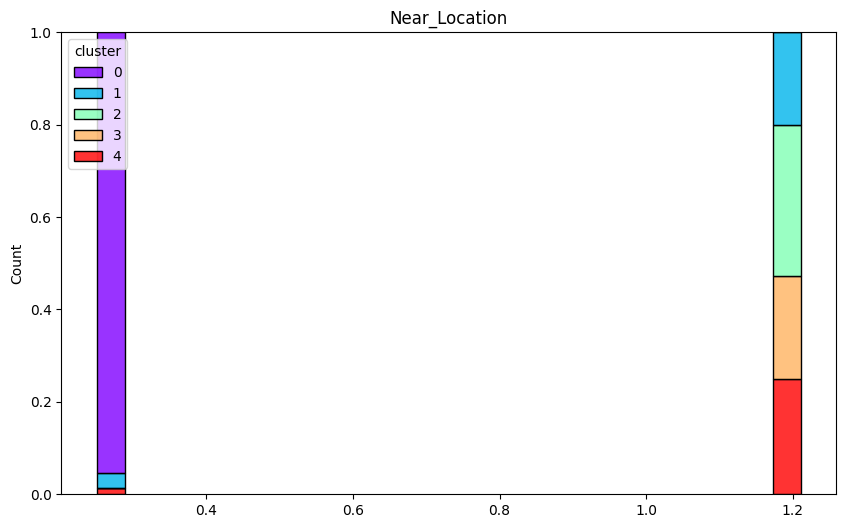

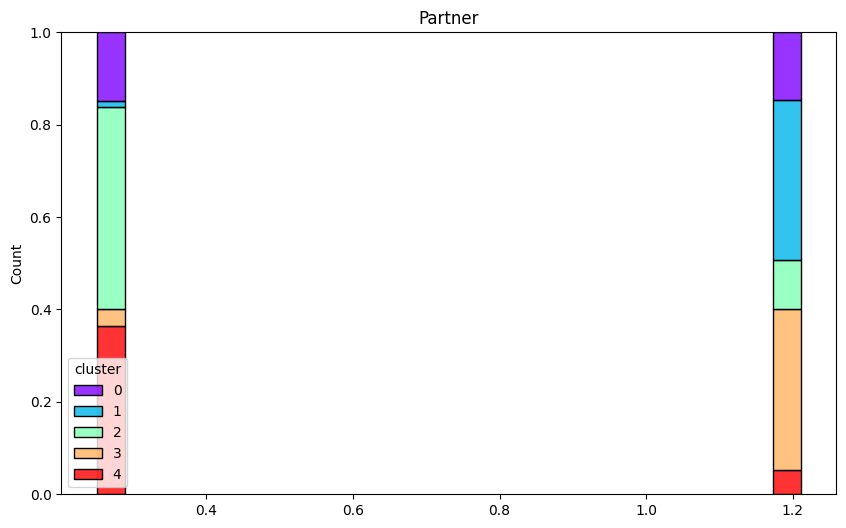

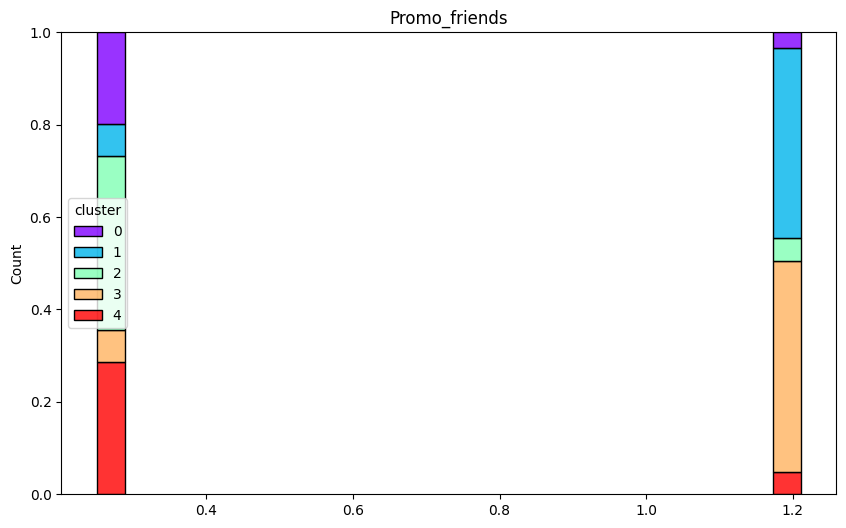

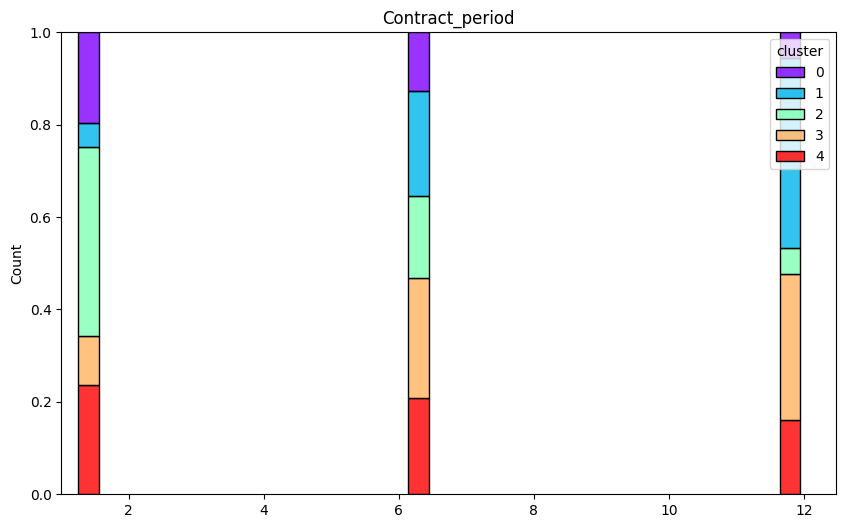

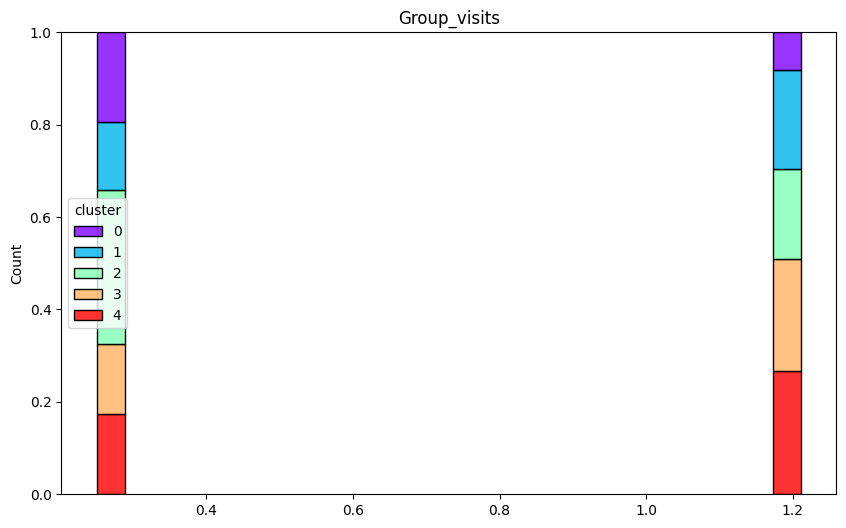

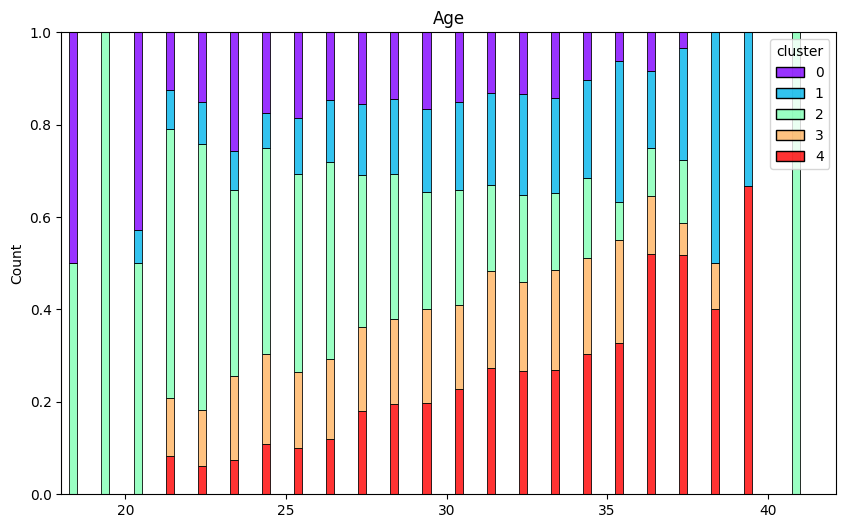

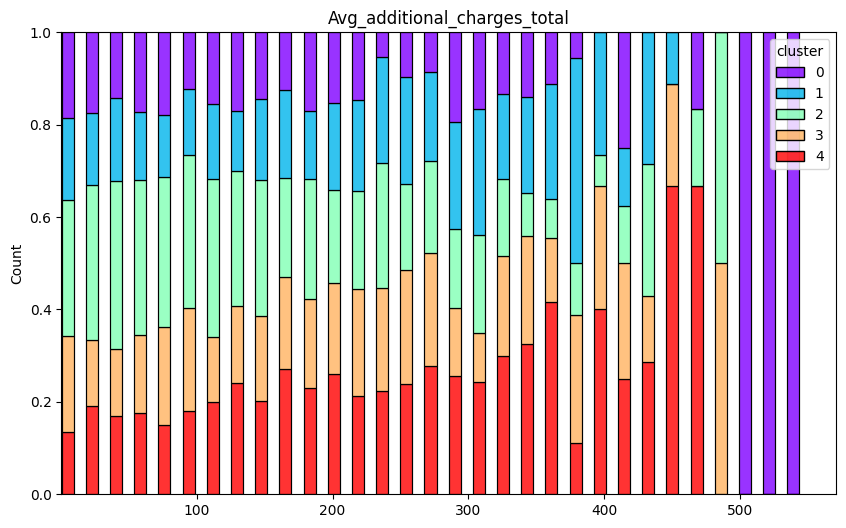

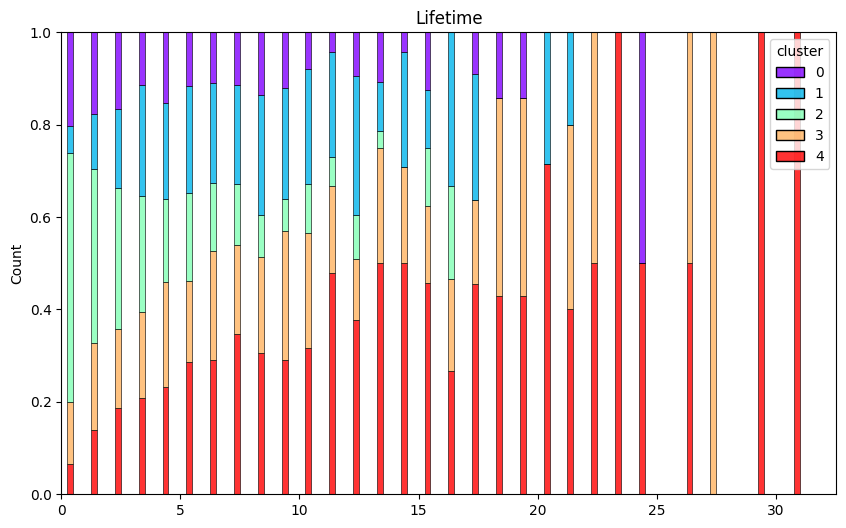

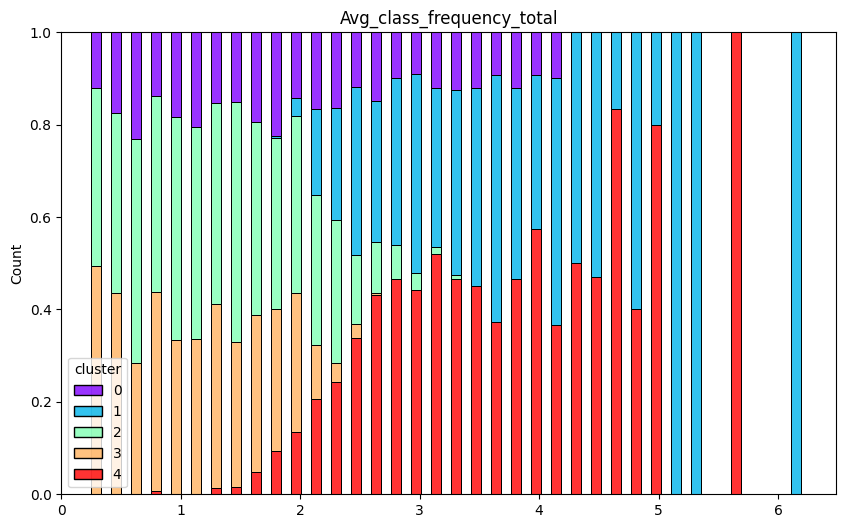

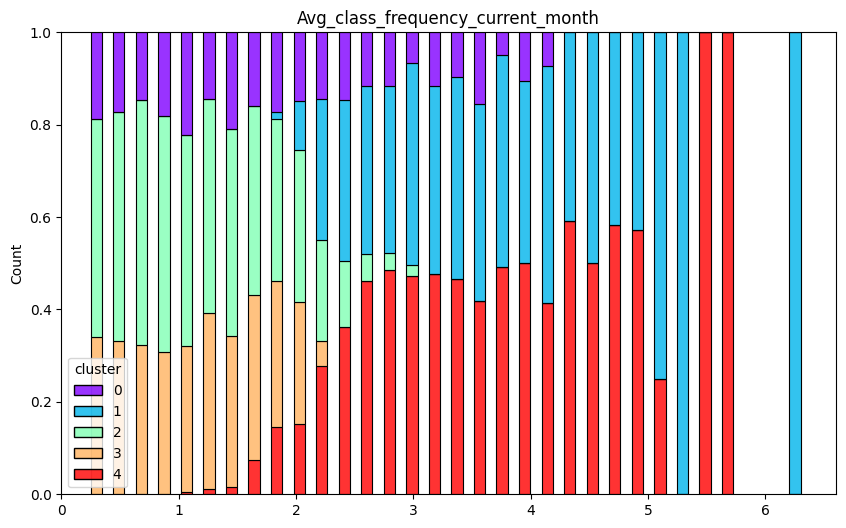

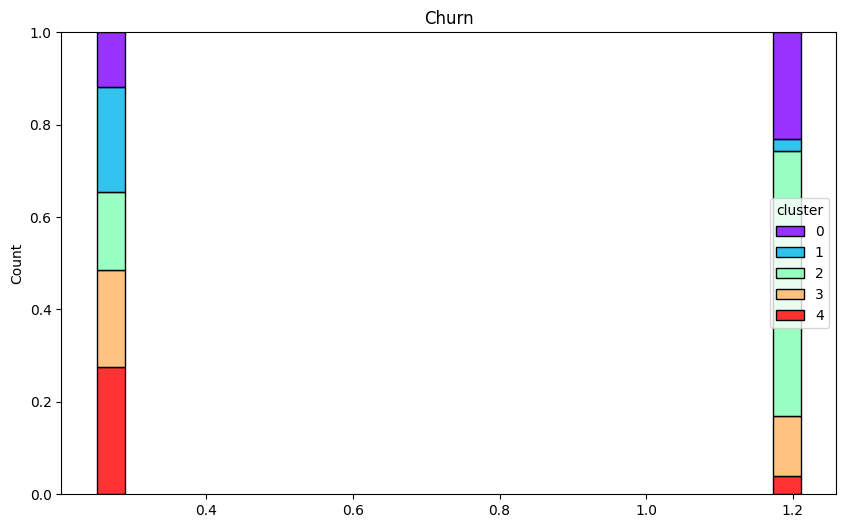

In [16]:
for item in fitclub.drop('cluster', axis=1).columns:
    plt.figure(figsize=(10,6))
    sns.histplot(
        data=fitclub, x=item, hue='cluster', 
        palette='rainbow', common_norm=False, alpha=.8, element='bars', fill=True, shrink=0.5, multiple='fill',)
    plt.title(item)
    plt.xlabel('')
    plt.show();

### "Портрет клиента"
Итого имеем 5 групп(кластеров):
- 0 - самая малочисленная: "Местные" клиенты, редко ходят на занятия, а особенно на групповые, имеют краткосрочные абонементы, приходят сами без рекомендаций;
- 2 - самая многочисленная: похожа на 0-ю, но состоит из "неместных", помоложе, мало тратит на доп.услуги, совсем недавно пришли в фитнесс-центр;
- 1 - сотрудники компаний-партнёров и пришедшие по приглашению друзей, имеют самые длинные абонементы и чаще других занимаются;
- 4 - похожа на 1-ю по частоте занятий, сроку хождения и большим расходам на доп.услуги, но принципиально самостоятельные и постарше.
- 3 - сотрудники компаний-партнёров и друзья, занятия посещают редко и, преимущественно, групповые.


- 0 и 2 - склонны к оттоку,
- 1 и 4 - самые надёжные.

Наконец, чтобы оценить качество кластеризации вычислим метрику силуэта:

In [17]:
#Силуэт
print('Силуэт нашего портрета :', silhouette_score(X_sc, labels)) 

Силуэт нашего портрета : 0.14384874647553808


силуэт слабый, маловыраженный, но с 3-мя кластерами был бы хуже.

## Выводы и рекомендации

Оттоку подвержены клиенты:
- Имеющие краткосрочные абонементы,
- Пришедшие без приглашения,
- Моложе и недавно обратившиеся в фитнесс-центр,
- Редко посещающие занятия.

Рекомендации по удержанию клиентов:
- Предложить более выгодные долгосрочные абонементы,
- Мотивирвать на интересные групповые занятия,
- Привлекать их компании к партнёрской программе.
- Предлагать беслпатные пробные групповые занятия, чтобы новички смогли влиться в жизнь фитнес-клуба.
- Чтобы повысить среднюю посещаемость новых клиентов, можно предложить различные скидки клиентам, кто приходит 3 раза в неделю.

